# Iris example

sources:

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
import itertools
import pandas as pd

In [2]:
def calculate_performace(result, target):
    c = np.zeros(shape=(3,3))
    accuracy = 0
    for index, row in result.iterrows():
        c[row[target],row['real']] = c[row[target],row['real']] + 1
        if row[target] == row['real']:
            accuracy = accuracy + 1
    print (target + ' model accuracy ' + str(accuracy / 50 * 100) + '%')
    print ('Rand score metric ' + str(metrics.adjusted_rand_score(result['real'], result[target])))
    print ('Mutual Info Score ' 
           + str(metrics.adjusted_mutual_info_score(result['real'], result[target],average_method='arithmetic')))
    print ('Confusion Matrix for 50 random test samples:')
    print (c)

# Basic 2: Plot dataset from sci-kit learn

In [3]:
# Load the data
iris = datasets.load_iris()
# X is the petal dimensions in a 2D array.  There are 150 rows and each row is one sample
# 0 = sepal length
# 1 = sepal width
# 2 = petal length
# 3 = petal width
X = iris.data
Xname = ['sepal length', 'sepal width', 'petal height', 'petal width']
# y is the species, each entry corresponds to one row in X
# 1 = Iris setosa 
# 2 = Iris versicolor
# 0 = Iris virginica
y = iris.target
yname = ['virginica', 'versicolor', 'setosa']

### Exploration of Data

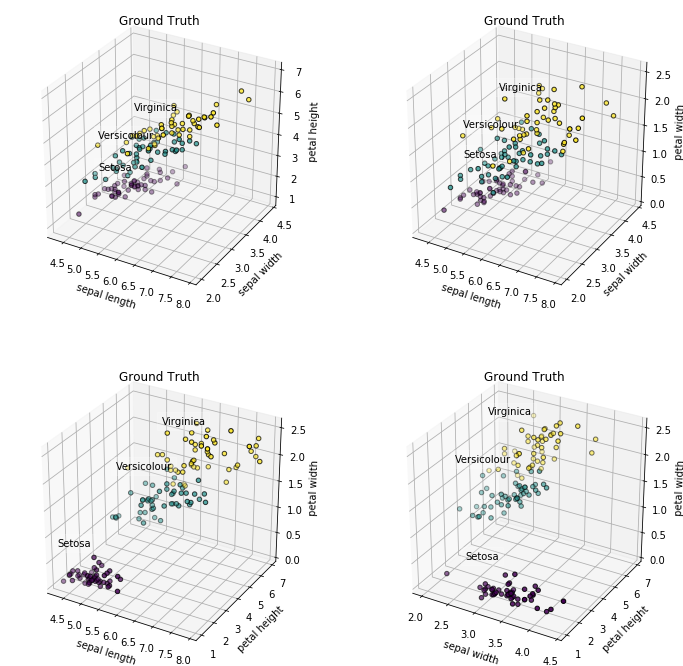

In [4]:
# plot all combinations in 3D plot
subplot_index = 1
for a, b, c in itertools.combinations([0,1,2,3], 3):
    # plot everything in 1 figure with 4 subplots in a 2 X 2 format
    fig = plt.figure(1, figsize=(12, 12))
    ax = fig.add_subplot(2, 2, subplot_index, projection='3d')
    subplot_index = subplot_index + 1
    # use a scatter plot and the column from the combination in the loop
    ax.scatter(X[:, a], X[:, b], X[:, c], c=y, edgecolor='k')
    ax.set_xlabel(Xname[a])
    ax.set_ylabel(Xname[b])
    ax.set_zlabel(Xname[c])
    ax.set_title('Ground Truth')
    # add labels to the data close to the mean values, +-0.5 to shift label
    for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
        ax.text3D(X[y == label, a].mean() - 0.5,
              X[y == label, b].mean(),
              X[y == label, c].mean() + 0.5, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))


### Split data into 100 for training and 50 for testing

In [5]:
# First add the y-column (flower type) to the data
Xy_random = np.append(X, y.reshape(150,1), axis=1)
# now randomize the rows with a fixed seed for repeatability
np.random.seed(510)
np.random.shuffle(Xy_random)

# Take training as first 100
Xy_train = Xy_random[:100]
y_train = Xy_train[:, -1]
X_train = Xy_train[:, :-1]

# Take test as the last 50
Xy_test = Xy_random[-50:150]
y_test = Xy_test[:, -1]
X_test = Xy_test[:, :-1]

# Basic 3: Use Logistic Regression to fit the training data and predict the test data

In [6]:
logisticModel = LogisticRegression(solver='lbfgs', multi_class='multinomial',
                                   random_state=50,  max_iter=200)
logisticModel.fit(X_train, y_train)
y_pred_log = logisticModel.predict(X_test)

# create dataframe comparing real and predicted results for test data of 50 points
result = pd.DataFrame()
result['real'] = y_test.astype(int)
result['logistic'] = y_pred_log.astype(int)

### Confusion Matrix from Test Data

In [7]:
calculate_performace(result, 'logistic')

logistic model accuracy 98.0%
Rand score metric 0.9400569459013937
Mutual Info Score 0.9279047668519467
Confusion Matrix for 50 random test samples:
[[17.  0.  0.]
 [ 0. 17.  1.]
 [ 0.  0. 15.]]


Logistic Regression works very well and is very easy to implement.

# Advanced 1: Perform classification using K-nearest Neighbors

In [8]:
KNearNeighModel = KNeighborsClassifier(n_neighbors=3)
KNearNeighModel.fit(X_train, y_train) 

y_pred_knn = KNearNeighModel.predict(X_test)
result['knn_3n'] = y_pred_knn.astype(int)

In [9]:
calculate_performace(result, 'knn_3n')

knn_3n model accuracy 96.0%
Rand score metric 0.883703481392557
Mutual Info Score 0.8570934143614843
Confusion Matrix for 50 random test samples:
[[17.  0.  0.]
 [ 0. 16.  1.]
 [ 0.  1. 15.]]


# Advanced 2: test the performance by changing different values of n neighbors

In [10]:
KNearNeighModel = KNeighborsClassifier(n_neighbors=6)
KNearNeighModel.fit(X_train, y_train) 

y_pred_knn = KNearNeighModel.predict(X_test)
result['knn_6n'] = y_pred_knn.astype(int)

In [11]:
calculate_performace(result,'knn_6n')

knn_6n model accuracy 96.0%
Rand score metric 0.8841727693917202
Mutual Info Score 0.8819288300675926
Confusion Matrix for 50 random test samples:
[[17.  0.  0.]
 [ 0. 17.  2.]
 [ 0.  0. 14.]]


In [12]:
KNearNeighModel = KNeighborsClassifier(n_neighbors=1)
KNearNeighModel.fit(X_train, y_train) 

y_pred_knn = KNearNeighModel.predict(X_test)
result['knn_1n'] = y_pred_knn.astype(int)

In [13]:
calculate_performace(result,'knn_1n')

knn_1n model accuracy 96.0%
Rand score metric 0.883703481392557
Mutual Info Score 0.8570934143614843
Confusion Matrix for 50 random test samples:
[[17.  0.  0.]
 [ 0. 16.  1.]
 [ 0.  1. 15.]]


The performance of the k-nearest neighbors classifer has a slightly better Mutual Info score of 88% for the 6 neighbor case as compared to both 3 and 1 which had 86%.  In all cases, however, 3, 6 and 1 neighbors, the results were 96% accurate.  Results could vary in different random seed cases since the test and train sets were chosen randomly.

# Reach 1: Use another type of classification

Support Vector Machines (SVM) are a very popular type of supervised clustering algorithm so I thought I should look into it here.

In [14]:
# Support Vector Machine
svmModel = SVC(gamma='scale',kernel='rbf').fit(X_train, y_train)
svm_predict = svmModel.predict(X_test)
result['svm'] = svm_predict.astype(int)

In [15]:
calculate_performace(result, 'svm')

svm model accuracy 98.0%
Rand score metric 0.9400569459013937
Mutual Info Score 0.9279047668519467
Confusion Matrix for 50 random test samples:
[[17.  0.  0.]
 [ 0. 17.  1.]
 [ 0.  0. 15.]]


SVM results are very good wiht a Mutual info score of 93% and 98% accuracy.  This matches the Logistic regression and is better than K-nearest Neighbors for this test set.<BR>
<BR>
I considered looking into K-Means, but since K-Means is an unsupervised clustering, the flower label enums do not always match the training label enums.  This is because the y-parameters are ignored for K-Means, so the labelling of each cluster is arbitrary.  K-Means also requires you to specify the number of clusters which we don't need to do for SVM, Logistic Regression, or K-Nearest Neighbors.  In some discussions around the web I found some people use K-Means in combination with other methods such as SVM to classify their labels.
https://stats.stackexchange.com/questions/264312/how-to-do-classification-after-clustering

# Reach 2: Decribe the model you are using

#### Logistic Regression

Given a two dimensional problem with two variables x1 and x2, and a response variable Y,

$$
p=(Y=1)
$$

$$
\log_{b}\frac{p}{1-p}=\beta_0+\beta_1x_1 + \beta_2x_2
$$


We can compute the log odds that Y=1.<BR>
    
It follows that we can modify the Beta coefficients in the model to minimize the odds that Y=1 given the input variables, and we can repeat the procedure for Y=0.  This will the be our model we can use to predict the outcome for new values of x1 and x2.
 
Pseudocode:<BR>
    Modify parameters B0, B1, B2 to maximize the probability that Y=1 while minimizing  Y=0 according to known optimisation algorithms<BR>

https://en.wikipedia.org/wiki/Logistic_regression

#### K-nearest neighbors

Each point in the K-nearest neighbors algorithm is classified by assigning it to the class that is the most common among the k nearest neighbors.

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

Pseudocode:<BR>
"Crawl" through points<BR>
  what is the class of the nearest points?  Assign that point the same class.<BR>
  If the nearest points have no class, assign it a new class.<BR>
  Next point should be a point that is near to the current point.<BR>

#### SVM

For the SVM, a hyperplane is created to split the data points into categories.  The hyperplane is chosen so that the distance to each point is maximized.

For example, for a two dimensional classification problem with two categories, a line in the form of "0 = ax + by + c" is drawn, then the distance from all the points on the plane to the line are calculated for each of the two categories.  It is this total distance that is minimized by changing values a, b, and c in the formula.

source: https://en.wikipedia.org/wiki/Support-vector_machine

Pseudocode:<BR>
Create a hyperplane with parameters a,b,c according to "0 = ax + by + c"<BR>
  calculate distance to all points in each category<BR>
  minimize the distance by modifying the parameters "a", "b", and/or "c" in a loop according to known optimisation algorithms<BR>
  

# Result Table

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(result)

    real  logistic  knn_3n  knn_6n  knn_1n  svm
0      1         1       1       1       1    1
1      0         0       0       0       0    0
2      1         1       1       1       1    1
3      0         0       0       0       0    0
4      2         2       2       2       2    2
5      2         2       2       2       2    2
6      2         2       2       2       2    2
7      1         1       1       1       1    1
8      0         0       0       0       0    0
9      0         0       0       0       0    0
10     0         0       0       0       0    0
11     1         1       1       1       1    1
12     2         2       2       2       2    2
13     0         0       0       0       0    0
14     1         1       2       1       2    1
15     2         2       2       2       2    2
16     1         1       1       1       1    1
17     2         2       2       1       2    2
18     1         1       1       1       1    1
19     1         1       1       1      